# WIP

# Logistic Regression From Scratch

We are going to build logistic regression from scratch using gradient descent

## $$ L(y,\hat{y}) = -\frac{1}{m}\sum_{i=1}^{m}[y_i\cdot log(\hat{y}_i) + (1-y_i) \cdot log(1-\hat{y}_i)]$$

## $$ \frac{d}{d\hat{L}}[ -y\cdot log(\hat{y}) + (1-y) \cdot log(1-\hat{y})] = $$

## $$ \frac{dL}{d\hat{y}}\Big(\frac{1}{1+e^{-x}}\Big) = \hat{y} \cdot(1-\hat{y}) $$

## $$ \frac{\hat{y}}{dw}\Big(\frac{1}{1+e^{-x}}\Big) = \hat{y} \cdot(1-\hat{y}) $$

## $$ n \cdot log(x) = \frac{n}{x} \quad \rightarrow \quad -y \cdot log(\hat{y}) = \frac{-y}{\hat{y}} $$

#### $$ \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} \quad \longrightarrow \quad \frac{-y}{\hat{y}} \cdot (\frac{1}{\hat{y}} - 1) + \frac{1-y}{1-\hat{y}} \quad \longrightarrow \quad \frac{-y \cdot \frac{1}{\hat{y}} + y + 1 - y }{1-\hat{y}} \cdot {\hat{y}}  \quad \longrightarrow \quad \frac{\hat{y}-y}  {\hat{y} \cdot (1-\hat{y})}  $$

## $$ \hat{y} \cdot(1-\hat{y}) $$

## $$ \frac{d\hat{y}}{dx} (x_1 \cdot w_1+...+x_n \cdot w_n)' = x_n $$

## $$ \frac{\hat{y}-y}  {\hat{y}(1-\hat{y})} \cdot \hat{y}(1-\hat{y}) \cdot x $$

# $$ x_i \cdot (\hat{y}-y)$$

## $$ \hat{y} = \frac{1}{1 + e^{-x}} $$

## $$ x = x_1*w_1 + ... + x_n*w_n $$

\begin{equation}
  L_\hat{y}=\begin{cases}
    -log(\hat{y}), & \text{if $y = 1$}\\
    -log(1 - \hat{y}), & \text{if $y = 0$}
  \end{cases}
\end{equation}



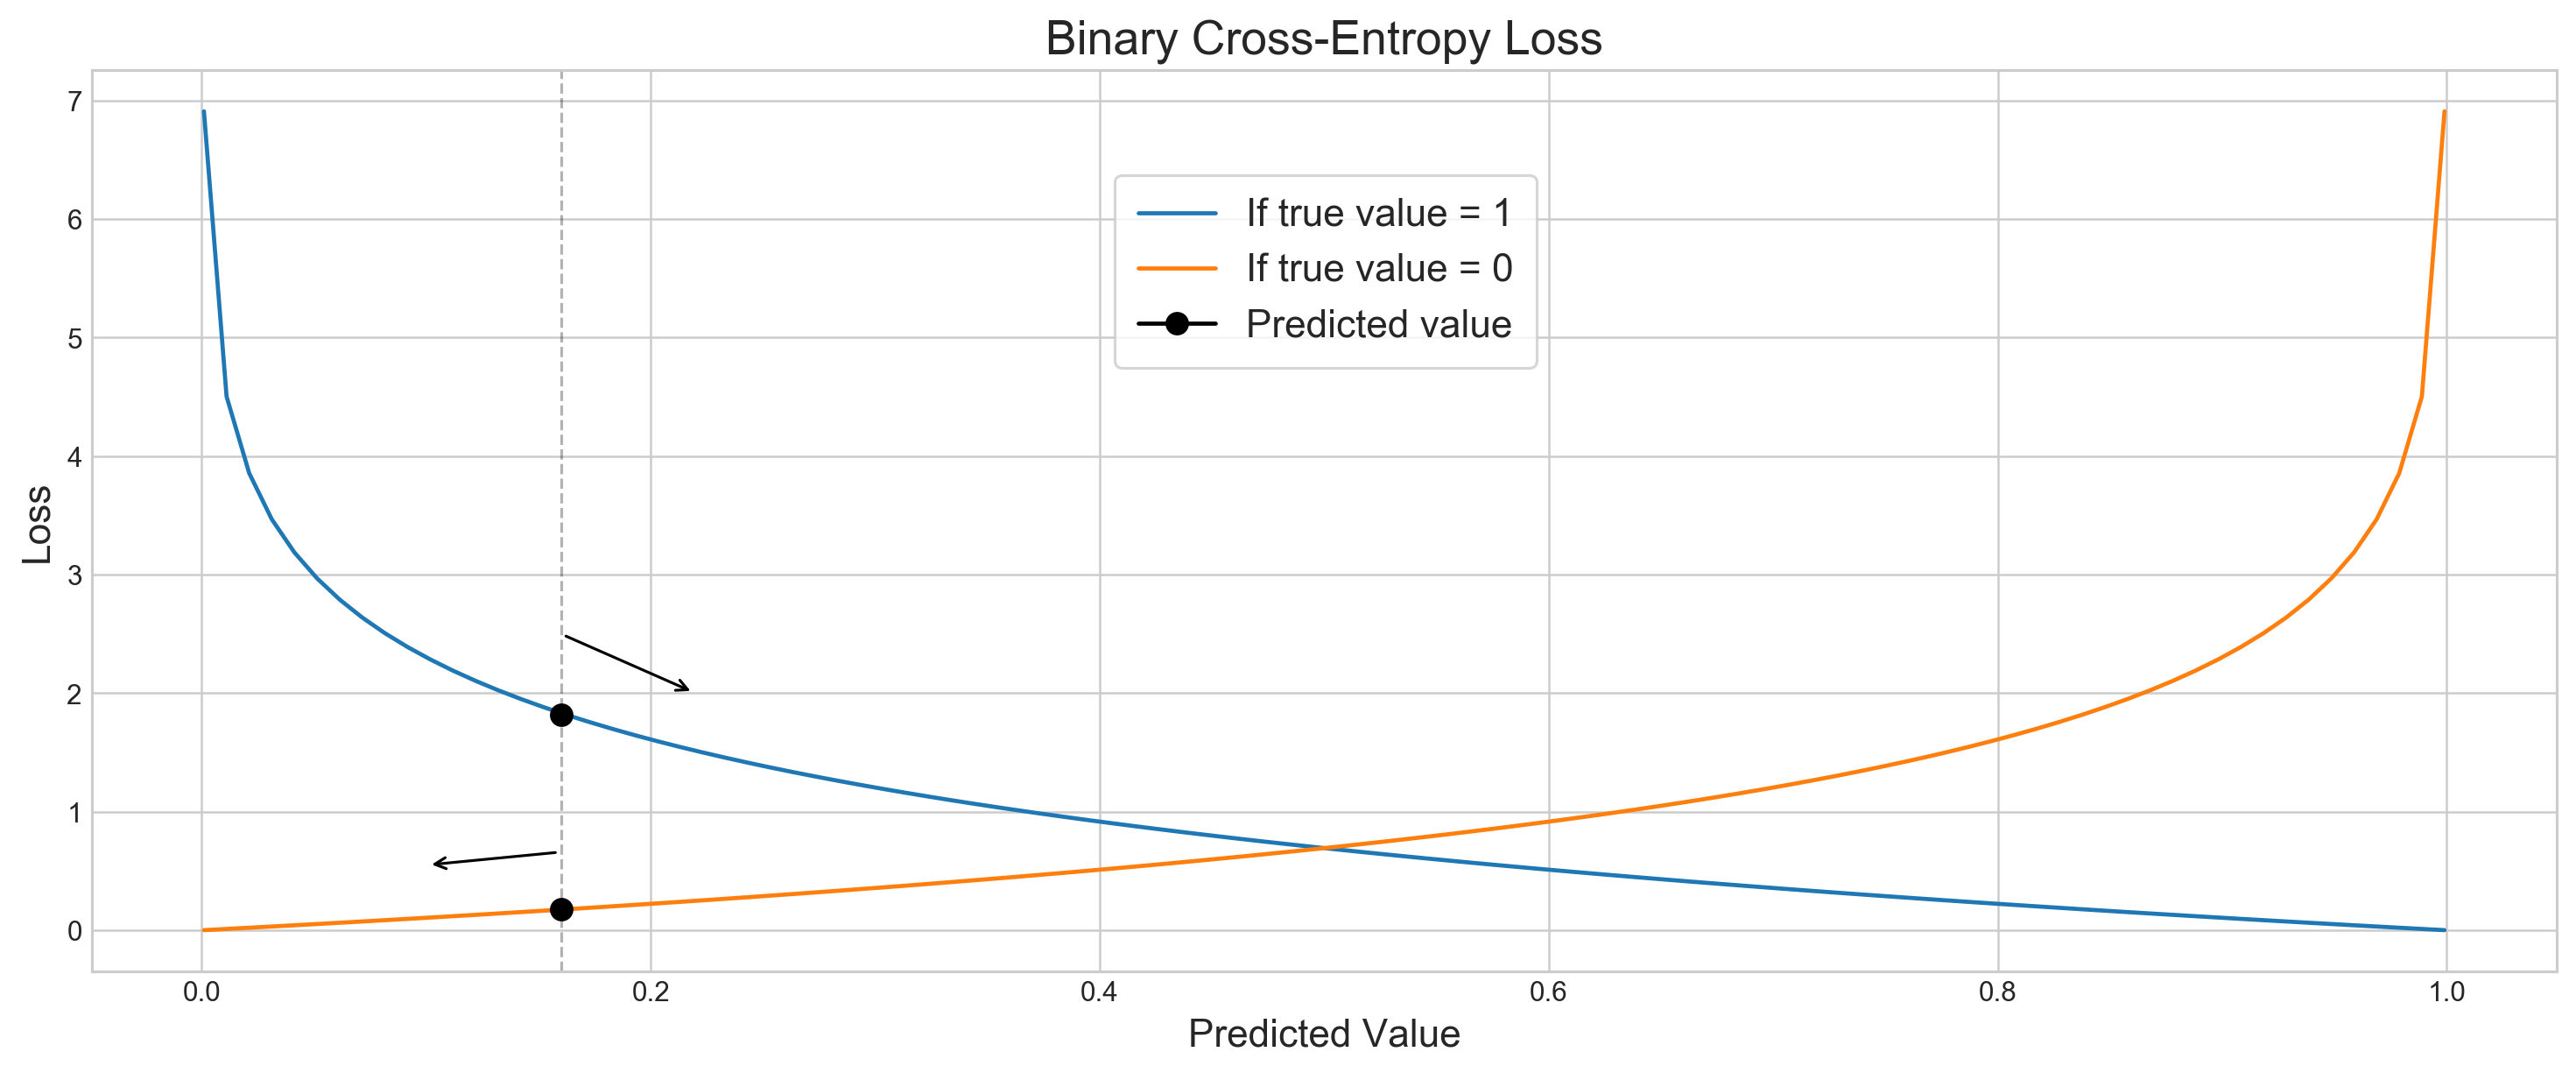

In [289]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss', fontSize=17)
plt.xlabel('Predicted Value', fontSize=14)
plt.ylabel('Loss', fontSize=14)
plt.show()

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Breast Cancer Dataset

In [3]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

In [4]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Scaling

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

## Train and Test Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Logistic Regression

In [15]:
class LogisticRegression:
    
    def sigmoid(self, x):
        return 1 / (1 + np.e**(-x))
    
    def cost_function(self, X, y, weights):         
        
        cost_for_1 = y * np.log(self.sigmoid(np.dot(X, weights)))
        cost_for_0 = (1 - y) * np.log(1 - self.sigmoid(np.dot(X, weights)))
        return -sum(cost_for_1 - cost_for_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):
        
        loss = []
        N = len(X)
        weights = np.random.rand(X.shape[1])
                   
        for _ in range(epochs):
        
            # Gradient Descent
            y_hat = self.sigmoid(np.dot(X, weights))
            weights -= lr * np.dot(X.T,  y_hat - y) / N
            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights))
        
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):
        
        # Predicting with sigmoid function
        z = np.dot(X, self.weights)        
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

## Predictions

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=300, lr=0.1)
y_pred = logreg.predict(X_test)

## Evaluation

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        67
           1       0.92      1.00      0.96       121

    accuracy                           0.94       188
   macro avg       0.96      0.92      0.93       188
weighted avg       0.95      0.94      0.94       188



In [76]:
print(confusion_matrix(y_test, y_pred))

[[ 56  11]
 [  0 121]]


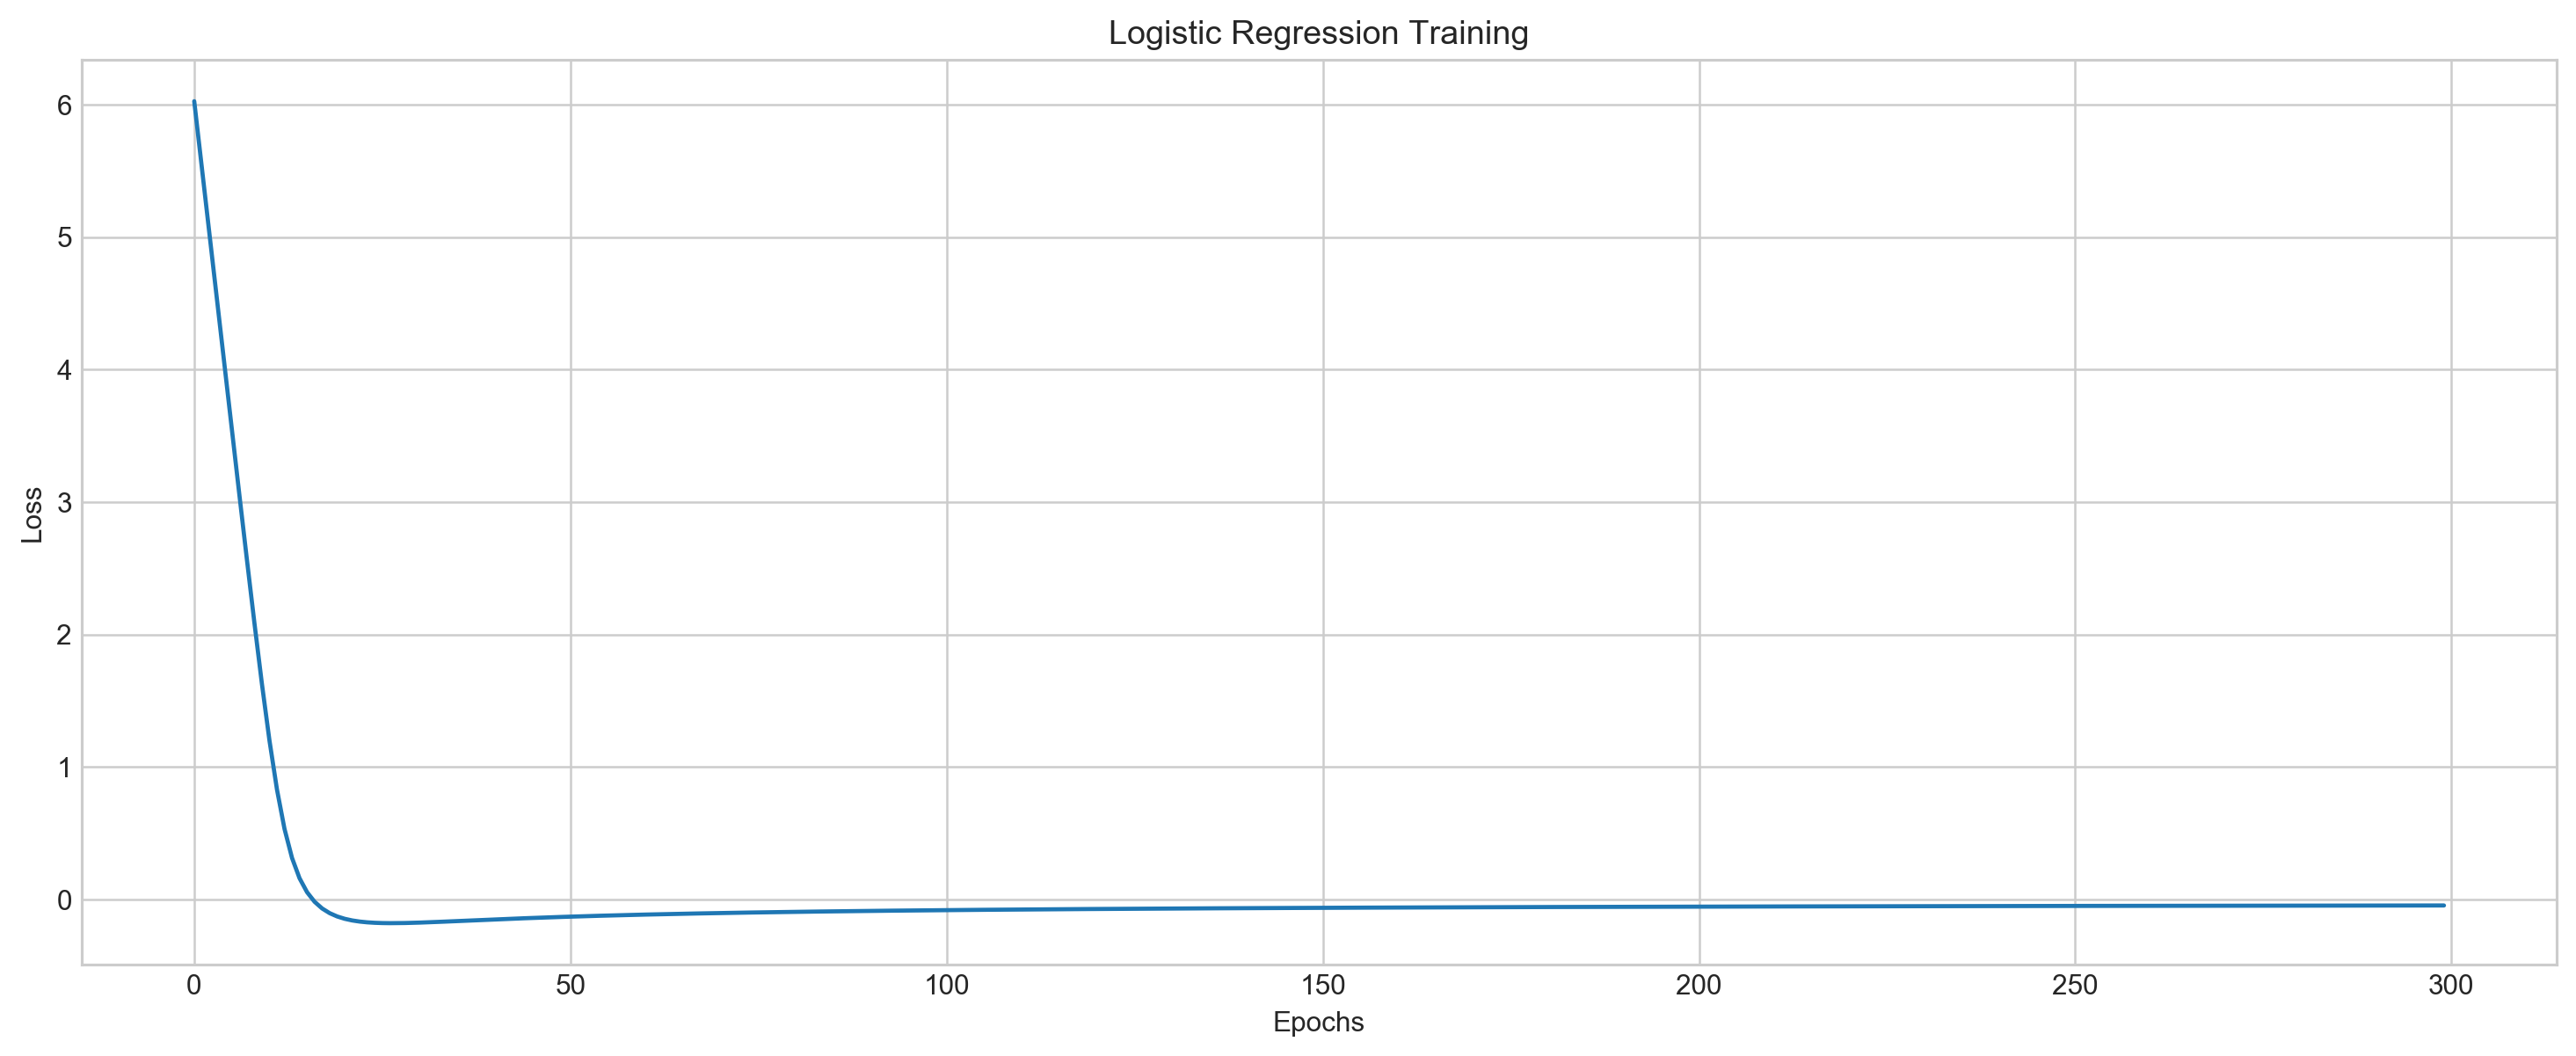

In [77]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Conclusion

In [37]:
pd.DataFrame(logreg.weights, columns=['coefs'], index=feature_names).sort_values('coefs', ascending=False)

,coefs
concavity error,1.707126
area error,1.533838
mean fractal dimension,1.532505
fractal dimension error,1.458637
worst fractal dimension,0.915337
smoothness error,0.869495
compactness error,0.821674
symmetry error,0.711241
texture error,0.515594
perimeter error,0.028773
